### Steps:
1. **Random Initialization**:
   - Randomly assign a number, from $ 1 $ to $ K $, to each of the observations (could be gaussian dist)
   - serve as initial cluster assignments for the observations.

2. **Iterate Until Convergence** (until the cluster assignments stop changing):
   - (a) **Compute Cluster Centroid**:  
     For each of the $ K $ clusters, compute the cluster centroid.  
     The centroid of the $ k $-th cluster is the vector of the feature means for the observations in the $ k $-th cluster:
     $$
     \mu_k = \frac{1}{|C_k|} \sum_{\mathbf{x}_i \in C_k} \mathbf{x}_i
     $$
     where $ C_k $ is the set of points in cluster $ k $, and $ |C_k| $ is the number of points in that cluster.

   - (b) **Assign Each Observation to the Nearest Cluster**:  
     Assign each observation to the cluster whose centroid is closest, where "closest" is defined using the **Euclidean distance**:
     $$
     \|\mathbf{x}_i - \mu_k\|^2 = \sum_{j=1}^p (x_{ij} - \mu_{kj})^2
     $$

Guarantee: **decrease the value of the objective function** at each step:
  $$
  J = \sum_{k=1}^K \sum_{\mathbf{x}_i \in C_k} \|\mathbf{x}_i - \mu_k\|^2
  $$

Why guarantee? the following identity is illuminating:
$$
\frac{1}{|C_k|} \sum_{i, i' \in C_k} \sum_{j=1}^p (x_{ij} - x_{i'j})^2 = 2 \sum_{i \in C_k} \sum_{j=1}^p (x_{ij} - \bar{x}_{kj})^2
$$
where:
$$
\bar{x}_{kj} = \frac{1}{|C_k|} \sum_{i \in C_k} x_{ij}
$$
is the mean for feature $ j $ in cluster $ C_k $.


![](..\static\fig-kmeans.png)

### In general

- Choose a K and initialize labels randomly assigned to observations (typically easier to do with 2-dim / 2-col data)
- For each group/label, calculate mean/centroid coordinate
- For each observation (new assignment), see which centroid coordinate is closest to that observation and then assign that label of that centroid to the observation
    - using Euler distance
- For each group/label based on the new assignments, calculate the new mean/centroid coordinate
- So on...
- Until there is no change in observation assignment to the labels

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ISLP import load_data

from sklearn.cluster import \
    (KMeans,
    AgglomerativeClustering)

from scipy.cluster.hierarchy import \
    (dendrogram,
    cut_tree)
    
from ISLP.cluster import compute_linkage

KMeans(n_clusters=2, n_init=20, random_state=2)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


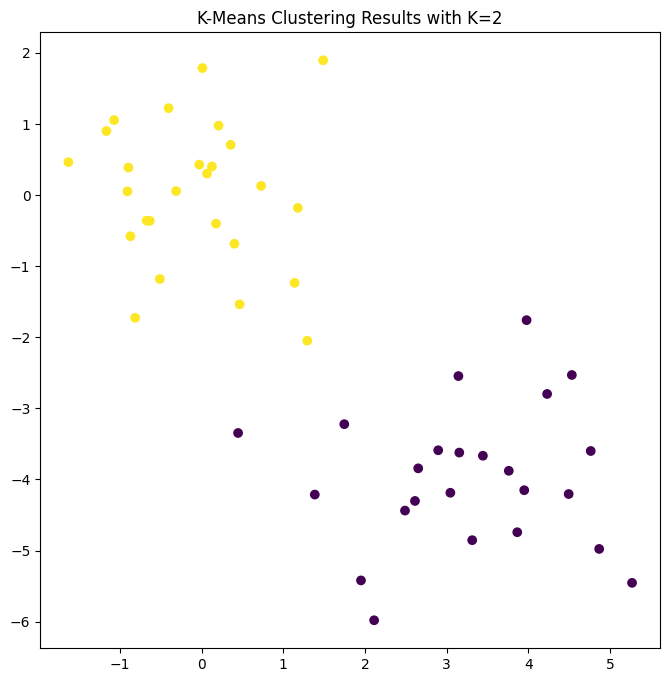

In [150]:
np.random.seed(0)

X = np.random.standard_normal((50, 2))

# manual change
# # to avoid too centered due to normal
X[:25, 0] += 3 
X[:25, 1] -= 4

# K
K = 2

kmeans = KMeans(
    n_clusters=K,
    random_state=2,
    n_init=20
).fit(X)

print(kmeans)
print(kmeans.labels_)

fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(
    X[:,0], 
    X[:,1], 
    c=kmeans.labels_ # colors
)
ax.set_title("K-Means Clustering Results with K=2");

KMeans(n_clusters=3, n_init=20, random_state=2)
[1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


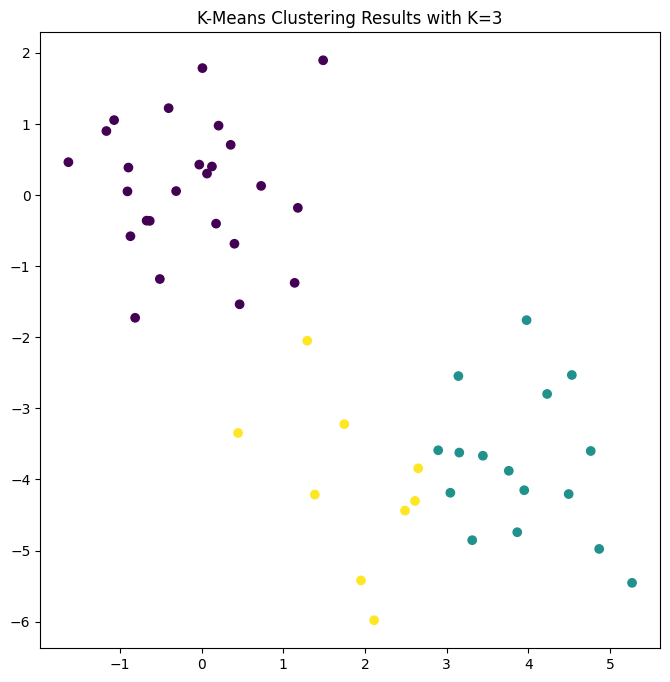

In [151]:
# K
K = 3

kmeans = KMeans(
    n_clusters=K,
    random_state=2,
    n_init=20
).fit(X)

print(kmeans)
print(kmeans.labels_)

fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(
    X[:,0], 
    X[:,1], 
    c=kmeans.labels_ # colors
)
ax.set_title("K-Means Clustering Results with K=3");

When K = 3, K-means clustering splits up the two clusters. We have used
the `n_init` argument to run the K-means with 20 initial cluster assignments
(the default is 10). If a value of `n_init` greater than one is used, then Kmeans clustering will be performed using multiple random assignments in
Step 1 of Algorithm 12.2, and the `KMeans()` function will report only the
best results. Here we compare using `n_init=1` to `n_init=20`.

Note that `kmeans.inertia_` is the total within-cluster sum of squares, which
we seek to minimize by performing K-means clustering.

We strongly recommend always running K-means clustering with a large
value of n_init, such as 20 or 50, since otherwise an undesirable local
optimum may be obtained.

In [152]:
kmeans1 = KMeans(
    n_clusters=3,
    random_state=3,
    n_init=1
).fit(X)

kmeans20 = KMeans(
    n_clusters=3,
    random_state=3,
    n_init=20
).fit(X)

kmeans1.inertia_, kmeans20.inertia_

(76.85131986999252, 75.06261242745384)

In [153]:
import numpy as np

def k_means(X, k, max_iters=200):

    # initialize
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iters):

        labels = np.argmin(
            np.linalg.norm(X[:, None] - centroids, axis=2), 
            axis=1
        )
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        if np.all(centroids == new_centroids): # converge
            break

        centroids = new_centroids

    return centroids, labels

K = 3
centroids_coords, labels = k_means(X, K)
centroids_coords, labels

(array([[ 0.13356828, -1.13677085],
        [ 3.37666751, -3.99915318],
        [-0.22839093,  0.71748445]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0,
        2, 2, 2, 2, 2, 2], dtype=int64))

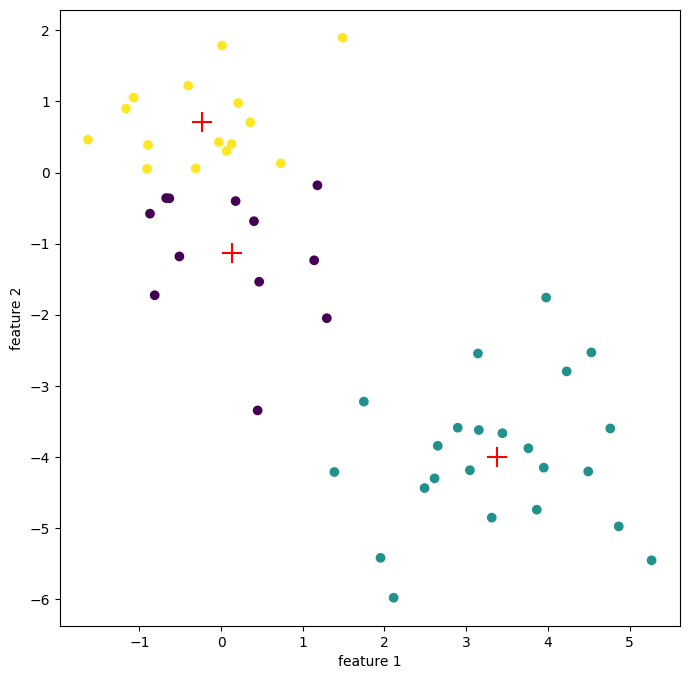

In [154]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids_coords[:, 0], centroids_coords[:, 1], c='red', s=200, marker='+')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()